# 🏅 Olympics Medal Analysis
This notebook analyzes Olympic medal data for various countries using **Python, Pandas, NumPy, and Matplotlib**.

## Objectives:
- Load & clean medal data
- Calculate total medals per country
- Find top-performing countries
- Visualize results with bar charts

---


In [2]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for Colab
%matplotlib inline


In [3]:
# 🗂 Create dataset: Medal counts for different countries
data = {
    "Country": ["USA", "China", "Japan", "Germany", "India", "UK", "Australia", "France", "Canada", "Brazil"],
    "Gold": [39, 38, 27, 10, 1, 22, 17, 10, 7, 7],
    "Silver": [41, 32, 14, 11, 2, 21, 7, 12, 6, 6],
    "Bronze": [33, 18, 17, 16, 4, 22, 22, 11, 11, 8]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (optional)
df.to_csv("olympics.csv", index=False)

# Display the original data
df


,Country,Gold,Silver,Bronze
0,USA,39,41,33
1,China,38,32,18
2,Japan,27,14,17
3,Germany,10,11,16
4,India,1,2,4
5,UK,22,21,22
6,Australia,17,7,22
7,France,10,12,11
8,Canada,7,6,11
9,Brazil,7,6,8


In [4]:
# 🧹 Data Cleaning

# Fill missing values (if any)
df = df.fillna(0)

# Remove duplicate rows
df = df.drop_duplicates()

# Convert medal counts to integers
df[["Gold", "Silver", "Bronze"]] = df[["Gold", "Silver", "Bronze"]].astype(int)

# Display cleaned data
df


,Country,Gold,Silver,Bronze
0,USA,39,41,33
1,China,38,32,18
2,Japan,27,14,17
3,Germany,10,11,16
4,India,1,2,4
5,UK,22,21,22
6,Australia,17,7,22
7,France,10,12,11
8,Canada,7,6,11
9,Brazil,7,6,8


In [5]:
# 📊 Analysis

# Calculate total medals
df["Total"] = df["Gold"] + df["Silver"] + df["Bronze"]

# Find country with most total medals
most_medals = df[df["Total"] == df["Total"].max()]

# Find country with most gold medals
most_gold = df[df["Gold"] == df["Gold"].max()]

# Calculate average gold medals
avg_gold = np.mean(df["Gold"])

print(f"🏆 Average Gold Medals: {round(avg_gold, 2)}")
print("\n🥇 Country with Most Total Medals:\n", most_medals)
print("\n🥇 Country with Most Gold Medals:\n", most_gold)


🏆 Average Gold Medals: 17.8

🥇 Country with Most Total Medals:
   Country  Gold  Silver  Bronze  Total
0     USA    39      41      33    113

🥇 Country with Most Gold Medals:
   Country  Gold  Silver  Bronze  Total
0     USA    39      41      33    113


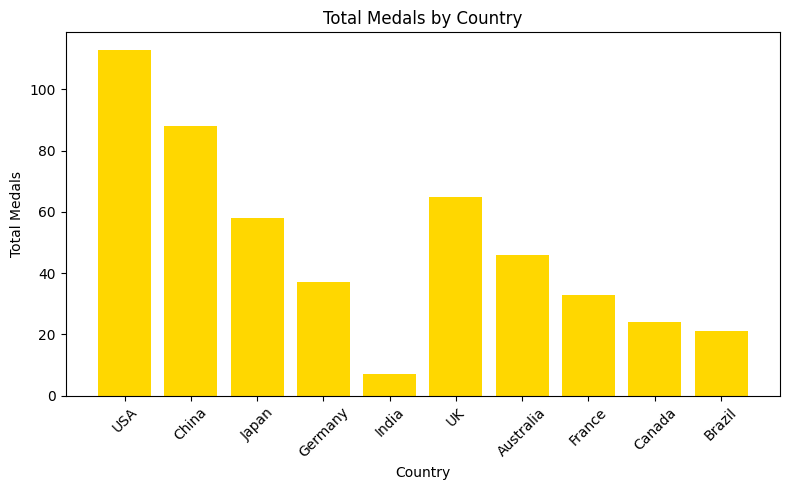

In [6]:
# 📈 Total medals bar chart
plt.figure(figsize=(8, 5))
plt.bar(df["Country"], df["Total"], color="gold")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.title("Total Medals by Country")
plt.tight_layout()

# Save figure
plt.savefig("total_medals.png")
plt.show()


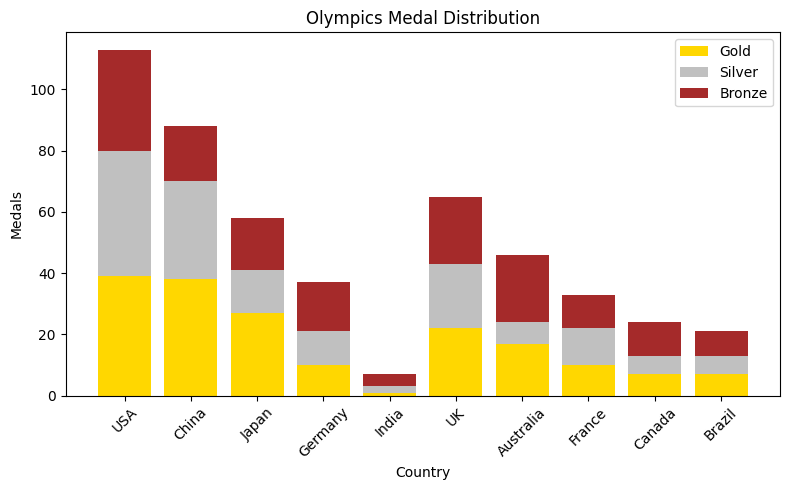

In [7]:
# 📊 Stacked bar chart for medal distribution
plt.figure(figsize=(8, 5))
plt.bar(df["Country"], df["Gold"], color="gold", label="Gold")
plt.bar(df["Country"], df["Silver"], bottom=df["Gold"], color="silver", label="Silver")
plt.bar(df["Country"], df["Bronze"], bottom=df["Gold"] + df["Silver"], color="brown", label="Bronze")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Medals")
plt.title("Olympics Medal Distribution")
plt.legend()
plt.tight_layout()

# Save figure
plt.savefig("medal_distribution.png")
plt.show()
